#  Recommendation System

A recommender system, or a recommendation system (sometimes replacing 'system' with a synonym such as platform or engine), is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item.

Recommender systems are used in a variety of areas, with commonly recognised examples taking the form of playlist generators for video and music services, product recommenders for online stores, or content recommenders for social media platforms and open web content recommenders.These systems can operate using a single input, like music, or multiple inputs within and across platforms like news, books, and search queries. There are also popular recommender systems for specific topics like restaurants and online dating. Recommender systems have also been developed to explore research articles and experts,collaborators,and financial services.

In this kernel we'll be building a baseline Music Recommendation System using Songs Dataset.


#  Types of Recommender Systems:-

Demographic Filtering-

Demographic Recommender system generate recommendations based on the user demographic attributes. It categorize the users based on their attributes and recommends the movies by utilizing their demographic data. Also they offer generalized recommendations to every user, based on movie popularity and/or genre.Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.

Content Based Filtering-

Content-based filtering uses item features to recommend other items similar to what the user likes, based on their previous actions or explicit feedback.This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.

Collaborative Filtering-

Collaborative filtering (CF) is a technique used by recommender systems.In the newer, narrower sense, collaborative filtering is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating).Collaborative filters do not require item metadata like its content-based counterparts.

## Demographic Filtering

Before getting started with this -

we need a metric to score or rate the song
Calculate the score for every song
Sort the scores and recommend the best listened song to the users.
We can use the average listen count of the song as the score but using this won't be fair enough since a song with 8.9 average listen count and only 3 votes cannot be considered better than the song with 7.8 as as average listen count but 40 votes. So, I'll be using weighted listen count (wl) which is given as :-

where, Weighted listen_count(WL)= (l/l+m.A) + (m/l+m.C)

l is the number of listen count for the song;
m is the minimum listen count required to be listed in the chart;
A is the average listen count of the song; And
C is the mean listen count across the whole report

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('song_data.csv')

In [9]:
data_subset = data[['User_id','Song_id', 'Listen_count']]
                   
df = data_subset[data_subset['Listen_count']>=10]
df 

,User_id,Song_id,Listen_count
66,969cc6fb74e076a68e36a04409cb9d3765757508,SONZWDK12A6701F62B,10
73,969cc6fb74e076a68e36a04409cb9d3765757508,SOXHIDK12A58A7CFB3,10
76,4bd88bfb25263a75bbdd467e74018f4ae570e5df,SOEPZQS12A8C1436C7,13
86,4bd88bfb25263a75bbdd467e74018f4ae570e5df,SOWPAXV12A67ADA046,18
87,4bd88bfb25263a75bbdd467e74018f4ae570e5df,SOXGQEM12AB0181D35,12
...,...,...,...
1048509,c012ec364329bb08cbe3e62fe76db31f8c5d8ec3,SOSHDXD12A8C1427A7,11
1048515,c012ec364329bb08cbe3e62fe76db31f8c5d8ec3,SOWFJWE12A8AE477AF,61
1048516,c012ec364329bb08cbe3e62fe76db31f8c5d8ec3,SOXAAFS12A8C14041D,95
1048518,c012ec364329bb08cbe3e62fe76db31f8c5d8ec3,SOZMBXS12A6D4F84D5,141


In [10]:
df1 = pd.DataFrame(data.groupby('Song')['Listen_count'].mean())

df1['Listen_count_avg'] = pd.DataFrame(data.groupby('Song')['Listen_count'].count())

df1.head()

,Listen_count,Listen_count_avg
Song,,
#!*@ You Tonight [Featuring R. Kelly] (Explicit Album Version) - The Notorious B.I.G.,1.545455,44
#40 - DAVE MATTHEWS BAND,5.511364,176
& Down - Boys Noize,1.906977,129
(Anaesthesia) Pulling Teath - Metallica,2.617647,34
(Antichrist Television Blues) - Arcade Fire,1.590164,61


In [11]:
frames = [df, df1]
df2 = pd.concat(frames)
display(df2)

,User_id,Song_id,Listen_count,Listen_count_avg
66,969cc6fb74e076a68e36a04409cb9d3765757508,SONZWDK12A6701F62B,10.000000,NaN
73,969cc6fb74e076a68e36a04409cb9d3765757508,SOXHIDK12A58A7CFB3,10.000000,NaN
76,4bd88bfb25263a75bbdd467e74018f4ae570e5df,SOEPZQS12A8C1436C7,13.000000,NaN
86,4bd88bfb25263a75bbdd467e74018f4ae570e5df,SOWPAXV12A67ADA046,18.000000,NaN
87,4bd88bfb25263a75bbdd467e74018f4ae570e5df,SOXGQEM12AB0181D35,12.000000,NaN
...,...,...,...,...
the Love Song - K-OS,NaN,NaN,4.244444,45.0
you were there with me - Four Tet,NaN,NaN,1.111111,27.0
¡Viva La Gloria! (Album Version) - Green Day,NaN,NaN,3.257426,101.0
¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,NaN,NaN,2.714286,42.0


In [12]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

df2['User_id']= label_encoder.fit_transform(df2['User_id'])
df2['Listen_count_avg']= label_encoder.fit_transform(df2['Listen_count_avg'])
df2['Song_id']= label_encoder.fit_transform(df2['Song_id'])

df2

,User_id,Song_id,Listen_count,Listen_count_avg
66,13769,4703,10.000000,590
73,13769,7707,10.000000,590
76,6912,1535,13.000000,590
86,6912,7463,18.000000,590
87,6912,7697,12.000000,590
...,...,...,...,...
the Love Song - K-OS,23318,8517,4.244444,34
you were there with me - Four Tet,23318,8517,1.111111,16
¡Viva La Gloria! (Album Version) - Green Day,23318,8517,3.257426,90
¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,23318,8517,2.714286,31


In [13]:
arr = df2.values
arr
arr = arr.astype('float')
arr

array([[1.37690000e+04, 4.70300000e+03, 1.00000000e+01, 5.90000000e+02],
       [1.37690000e+04, 7.70700000e+03, 1.00000000e+01, 5.90000000e+02],
       [6.91200000e+03, 1.53500000e+03, 1.30000000e+01, 5.90000000e+02],
       ...,
       [2.33180000e+04, 8.51700000e+03, 3.25742574e+00, 9.00000000e+01],
       [2.33180000e+04, 8.51700000e+03, 2.71428571e+00, 3.10000000e+01],
       [2.33180000e+04, 8.51700000e+03, 2.67777778e+00, 7.90000000e+01]])

In [25]:
# Normalizing the numerical data 

from sklearn.preprocessing import scale 

df_normal = scale(df2)
df_normal

array([[ 0.08344716, -0.01569979, -0.42425451,  0.37346822],
       [ 0.08344716,  1.08330097, -0.42425451,  0.37346822],
       [-0.84611516, -1.17469926, -0.27464901,  0.37346822],
       ...,
       [ 1.37794775,  1.37963606, -0.76049659, -2.54656828],
       [ 1.37794775,  1.37963606, -0.78758217, -2.89113258],
       [ 1.37794775,  1.37963606, -0.78940277, -2.61080908]])

In [26]:
feature = ['User_id' ,'Song_id','Listen_count_avg']
X = df2[feature] # Features
Y = df2["Listen_count"]

In [27]:
C= df2['Listen_count_avg'].mean()
C

526.0507622568882

In [28]:
# So, the mean Listen count average for all the songs is approx 526.
# The next step is to determine an appropriate value for m, the minimum listen count required to be listed in the chart. 
# We will use 90th percentile as our cutoff. In other words, for a song to feature in the charts, it must have more listen count than at least 90% of the songs in the list.

In [29]:
m= df2['Listen_count'].quantile(0.9)
m

34.0

In [30]:
# Now, we can filter out the songs that qualify for the chart

In [31]:
q_songs = df2.copy().loc[df2['Listen_count'] >= m]
q_songs.shape

(7976, 4)

In [32]:
# We see that there are 7976 songs which qualify to be in this list. 
# Now, we need to calculate our metric for each qualified song. 
# To do this, we will define a function, weighted_listen_count() and define a new feature score, of which we'll calculate the value by applying this function to our DataFrame of qualified songs:

In [33]:
def weighted_listen_count(X, m=m, C=C):
    l = X['Listen_count']
    A = X['Listen_count_avg']
    # Calculation based on the IMDB formula
    return (l/(l+m) * A) + (m/(m+l) * C)

In [34]:
# Define a new feature 'score' and calculate its value with `weighted_listen_count()`
q_songs['score'] = q_songs.apply(weighted_listen_count, axis=1)

In [35]:
# Finally, let's sort the DataFrame based on the score feature and output the Song id, listen count, listen count average and weighted listen count or score of the top 10 songs.

In [36]:
#Sort songs based on score calculated above
q_songs = q_songs.sort_values('score', ascending=False)

#Print the top 15 songs
q_songs[['User_id', 'Listen_count', 'Song_id','Listen_count_avg', 'score']].head(10)

,User_id,Listen_count,Song_id,Listen_count_avg,score
590159,7343,920.0,6655,590,587.720887
17178,17128,796.0,8415,590,587.380393
1048498,17525,683.0,529,590,586.967540
921479,10206,676.0,5255,590,586.937642
768319,19126,649.0,3772,590,586.816583
1017726,22332,605.0,7160,590,586.597380
289987,22015,585.0,8393,590,586.487441
921471,10206,553.0,3059,590,586.295956
1048519,17525,500.0,8388,590,585.928326
883336,3938,500.0,7629,590,585.928326


### Now something to keep in mind is that these demographic recommender provide a general chart of recommended songs to all the users. They are not sensitive to the interests and tastes of a particular user. This is when we move on to a more refined system- Content Basesd Filtering.

# Content Based Filtering

In this recommender system the content of the song is used to find its similarity with other songs. Then the songs that are most likely to be similar are recommended.

In [37]:
df5 = pd.read_csv('df5.csv')
df5

,User_id,Listen_count,Title
0,50996bbabb6f7857bf0c8019435b5246a0e45cfd,920,Crack Under Pressure
1,bb85bb79612e5373ac714fcd4469cabeb5ed94e1,796,Paradise & Dreams
2,c012ec364329bb08cbe3e62fe76db31f8c5d8ec3,683,You\'re The One
3,70caceccaa745b6f7bc2898a154538eb1ada4d5a,676,I\'m On A Boat
4,d2232ac7a1ec17b283b5dff243161902b2cb706c,649,Reelin\' In The Years
...,...,...,...
22341,8d260bf207bc95999781cfb063e59e7f05649bc1,20,Luka
22342,472a1e1ca78a14a587ae0d46ba253abc121dffb2,20,Yearnin\'
22343,472a1e1ca78a14a587ae0d46ba253abc121dffb2,20,Meet Me In the City
22344,53d774ce515dfb77fa3182a499c853945a7122af,20,Rebirth of Slick (Cool Like Dat) (2005 Digital...


In [38]:
# Plot description based Recommender¶
# We will compute pairwise similarity scores for all songs based on their plot descriptions and recommend songs based on that similarity score.

In [39]:
df5['Title'].head(5)

0     Crack Under Pressure
1        Paradise & Dreams
2          You\'re The One
3           I\'m On A Boat
4    Reelin\' In The Years
Name: Title, dtype: object

####
For any of you who has done even a bit of text processing before knows we need to convert the word vector of each overview. Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

Now if you are wondering what is term frequency , it is the relative frequency of a word in a document and is given as (term instances/total instances). Inverse Document Frequency is the relative count of documents containing the term is given as log(number of documents/documents with term) The overall importance of each word to the documents in which they appear is equal to TF * IDF

This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a song, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines.

In [40]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df5['Title'] = df5['Title'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df5['Title'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(22346, 4914)

#### 
We see that over 22,346 different words were used to describe the 4914 songs in our dataset.

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the cosine similarity scores. There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two songs. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

In [42]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [43]:
# We are going to define a function that takes in a song title as an input and outputs a list of the 10 most similar songs. Firstly, for this, we need a reverse mapping of song titles and DataFrame indices. In other words, we need a mechanism to identify the index of a song in our metadata DataFrame, given its title.

In [44]:
#Construct a reverse map of indices and song titles
indices = pd.Series(df5.index, index=df5['Title'])

In [45]:
# Function that takes in song title as input and outputs most similar song
def get_recommendations(Song, cosine_sim=cosine_sim):
    # Get the index of the song that matches the title
    idx = indices[Song]

    # Get the pairwsie similarity scores of all songs with that song
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the songs based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar songs
    sim_scores = sim_scores[1:10]

    # Get the song indices
    Song_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar songs
    return df5['Title'].iloc[Song_indices]

In [46]:
get_recommendations('Time Bomb')

3581     Time Bomb (Album Version)
13741    Time Bomb (Album Version)
15215    Time Bomb (Album Version)
15255    Time Bomb (Album Version)
17398    Time Bomb (Album Version)
19328    Time Bomb (Album Version)
586                      Fire Bomb
15556                    Fire Bomb
591              It\'s Not My Time
Name: Title, dtype: object

In [47]:
get_recommendations('Luka')

0                    Crack Under Pressure
1                       Paradise & Dreams
2                         You\'re The One
3                          I\'m On A Boat
4                   Reelin\' In The Years
5    Can\'t Help But Wait (Album Version)
6                               The Quest
7                   Fast Car (LP Version)
8                             Peace Train
Name: Title, dtype: object

## User-based collaborative filtering

Our content based engine suffers from some severe limitations. It is only capable of suggesting songs which are close to a certain song. That is, it is not capable of capturing tastes and providing recommendations across genres.

Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a song will receive the same recommendations for that song, regardless of who she/he is.

Therefore, in this section, we will use a technique called Collaborative Filtering to make recommendations to Song Listeners. It is basically of two types:-

User based filtering- These systems recommend products to a user that similar users have liked. For measuring the similarity between two users we can either use pearson correlation or cosine similarity.

In [48]:
# import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import dask.dataframe as ddf
import psutil
 
#Loading the dataset using dask
memory_timestep_3 = psutil.virtual_memory()
 
data = ddf.read_csv("song_data.csv")
 
memory_timestep_4 = psutil.virtual_memory()
 
memory_used_ddf = (memory_timestep_4[3] - memory_timestep_3[3])/(1024*1024)
print("Memory acquired using dask: %.4f MB"%memory_used_ddf)
 
 
#Loading the dataset using pandas
memory_timestep_1 = psutil.virtual_memory()
 
data = pd.read_csv("song_data.csv")
 
memory_timestep_2 = psutil.virtual_memory()
 
memory_used_pd = (memory_timestep_2[3] - memory_timestep_1[3])/(1024*1024)
print("Memory acquired using pandas: %.4f MB"%memory_used_pd)

Memory acquired using dask: 23.2578 MB
Memory acquired using pandas: 41.4414 MB


In [49]:
data.head()

,User_id,Song_id,Listen_count,Title,Artist,Song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Jack Johnson,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Kanye West,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters,Learn To Fly - Foo Fighters


In [50]:
data.shape

(1048575, 6)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   User_id       1048575 non-null  object
 1   Song_id       1048575 non-null  object
 2   Listen_count  1048575 non-null  int64 
 3   Title         1048575 non-null  object
 4   Artist        1048575 non-null  object
 5   Song          1048575 non-null  object
dtypes: int64(1), object(5)
memory usage: 48.0+ MB


In [52]:
data.dtypes

User_id         object
Song_id         object
Listen_count     int64
Title           object
Artist          object
Song            object
dtype: object

In [53]:
data.memory_usage(deep=True) 

Index                 128
User_id         101711775
Song_id          78643125
Listen_count      8388600
Title            78968993
Artist           74194845
Song             96481478
dtype: int64

In [54]:
data.describe()

,Listen_count
count,1.048575e+06
mean,3.291285e+00
std,7.212668e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.200000e+02


In [55]:
n_listen_count = len(data['Listen_count'].unique())
n_song = len(data['Song_id'].unique())
n_users = len(data['User_id'].unique())

In [56]:
print(f"Number of Listen_count: {n_listen_count}")
print(f"Number of unique Song_id: {n_song}")
print(f"Number of unique User_id: {n_users}")
print(f"Average Listen_count per user: {round(n_listen_count/n_users, 2)}")
print(f"Average Listen_count per Song: {round(n_listen_count/n_song, 2)}")

Number of Listen_count: 272
Number of unique Song_id: 10000
Number of unique User_id: 62347
Average Listen_count per user: 0.0
Average Listen_count per Song: 0.03


In [57]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

data['User_id']= label_encoder.fit_transform(data['User_id'])
data['Song_id']= label_encoder.fit_transform(data['Song_id'])

In [58]:
user_freq = data[['User_id', 'Song_id']].groupby('User_id').count().reset_index()
user_freq.columns = ['User_id', 'n_listen_count']
user_freq.head()

,User_id,n_listen_count
0,0,7
1,1,5
2,2,9
3,3,9
4,4,14


# Exploratory Data Analysis

This section will contain data exploration and visualizations in order to take a closer look at the cleaned datasets.
Before I can start building and evaluating different models, I need to answer the following questions:

▻ What are highest listened songs?

▻ What are lowest listened songs?

▻ What are top 20 repeated songs?

▻ What is the frequency of listen count values?

▻ Which are the most common Artists that people listen to?

▻ Which all Song_id's belongs to most listened songs?

▻ What is the distribution between Listen count and Listen count average?

▻ Which are the most common Title that people listen to?

In [59]:
# Find Lowest and Highest listened song:
mean_listen_count = data.groupby('User_id')[['Listen_count']].mean()

# Lowest listened songs
lowest_listen_count = mean_listen_count['Listen_count'].idxmin()
data.loc[data['User_id'] == lowest_listen_count]

,User_id,Song_id,Listen_count,Title,Artist,Song
523971,13,1069,1,Give It Up (LP Version),Pepper,Give It Up (LP Version) - Pepper
523972,13,3292,1,Tequila,The Champs,Tequila - The Champs
523973,13,8495,1,The Message,Grandmaster Flash & The Furious Five,The Message - Grandmaster Flash & The Furious ...


In [60]:
# Highest listened songs
highest_listen_count = mean_listen_count['Listen_count'].idxmax()
data.loc[data['User_id'] == highest_listen_count]

,User_id,Song_id,Listen_count,Title,Artist,Song
420918,47074,6386,28,He Wasn\'t Man Enough,Toni Braxton,He Wasn\'t Man Enough - Toni Braxton
420919,47074,9814,356,Officially Missing You (Radio Version),Tamia,Officially Missing You (Radio Version) - Tamia


In [61]:
# Which songs are getting repeated

%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = (20, 6)
repeats=data[data.Listen_count==1]
song_repeats=repeats.groupby('Song',as_index=False).User_id.count()
song_repeats.columns=['Song','Listen_count']

print("Top 20 songs repeated")
repeats.Song.value_counts()[:20]

Top 20 songs repeated


Sehr kosmisch - Harmonia                                                                                                                        2395
Dog Days Are Over (Radio Edit) - Florence + The Machine                                                                                         1976
Undo - Björk                                                                                                                                    1873
Secrets - OneRepublic                                                                                                                           1731
Revelry - Kings Of Leon                                                                                                                         1629
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile) - Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner    1617
Tive Sim - Cartola                                                                                        

In [62]:
data.groupby('Song')['Listen_count'].mean().sort_values(ascending=False).head()

Song
Crack Under Pressure - Righteous Pigs         24.260870
221 - keller williams                         19.886792
The Quest - HYPOCRISY                         15.745098
Working With Homesick - Homesick James        15.600000
Hounds of Love (new mix) - The Futureheads    15.162791
Name: Listen_count, dtype: float64

In [63]:
data.groupby('Song')['Listen_count'].count().sort_values(ascending=False).head()

Song
Sehr kosmisch - Harmonia                                   5599
Undo - Björk                                               4937
You\'re The One - Dwight Yoakam                            4499
Dog Days Are Over (Radio Edit) - Florence + The Machine    4246
Revelry - Kings Of Leon                                    4060
Name: Listen_count, dtype: int64

In [64]:
Listen_mean_count = pd.DataFrame(data.groupby('Song')['Listen_count'].mean())

In [65]:
Listen_mean_count['Listen_count_avg'] = pd.DataFrame(data.groupby('Song')['Listen_count'].count())

In [66]:
Listen_mean_count.head()

,Listen_count,Listen_count_avg
Song,,
#!*@ You Tonight [Featuring R. Kelly] (Explicit Album Version) - The Notorious B.I.G.,1.545455,44
#40 - DAVE MATTHEWS BAND,5.511364,176
& Down - Boys Noize,1.906977,129
(Anaesthesia) Pulling Teath - Metallica,2.617647,34
(Antichrist Television Blues) - Arcade Fire,1.590164,61


## Visualizations

<AxesSubplot:>

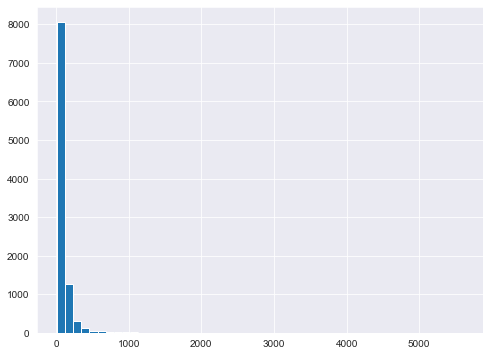

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
Listen_mean_count['Listen_count_avg'].hist(bins=50)

<AxesSubplot:>

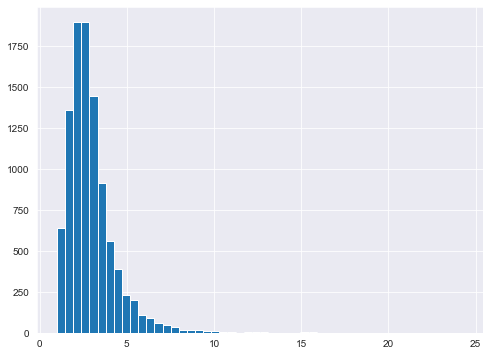

In [21]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
Listen_mean_count['Listen_count'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

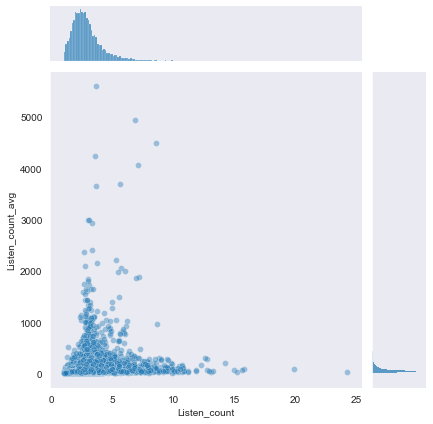

In [22]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Listen_count', y='Listen_count_avg', data=Listen_mean_count, alpha=0.4)

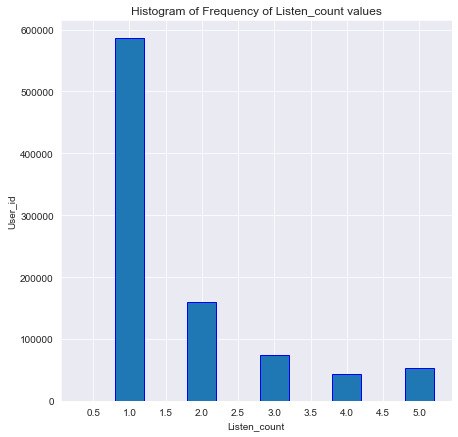

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize=(7,7))

bin_edges = np.arange(0.25,5.5,0.5)

plt.hist(data['Listen_count'],bins = bin_edges,edgecolor="b",rwidth=0.8)
plt.title('Histogram of Frequency of Listen_count values')
plt.xlabel('Listen_count')
plt.ylabel('User_id')
plt.grid('on')

plt.xticks(np.arange(0.5,5.5,0.5))
plt.show()

In [24]:
import matplotlib.pyplot as plt    
from wordcloud import WordCloud

def displaywc(txt,title):
    txt=""
    for i in g:
        txt+=str(i)
    wordcloud = WordCloud(background_color='white').generate(txt)

    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

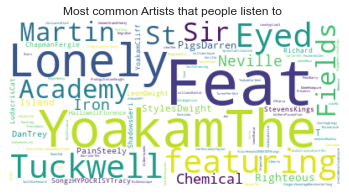

In [25]:
g=data.sort_values(by='Listen_count',ascending=False)[:200].Artist.tolist()
#TODO Investigate how to display chinese
txt=""
for i in g:
    txt+=str(i)
displaywc(txt,'Most common Artists that people listen to ')

Text(0, 0.5, 'Listen_count')

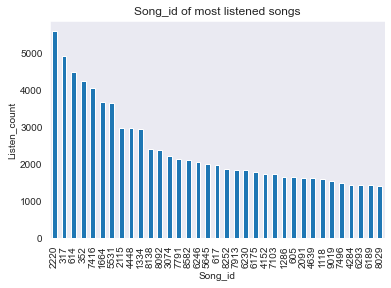

In [26]:
data.Song_id.value_counts()[:35].plot(kind='bar')
plt.title('Song_id of most listened songs')
plt.xlabel('Song_id')
plt.ylabel('Listen_count')

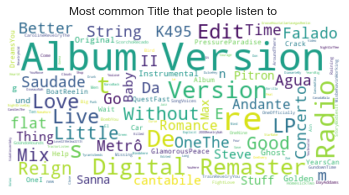

In [27]:
g=data.sort_values(by='Listen_count',ascending=False)[:200].Title.tolist()
txt=""
for i in g:
    txt+=str(i)
displaywc(txt,'Most common Title that people listen to ')

## USER BASED COLLABORATIVE FILTERING¶

The system becomes very simple when you imagine the following event flow in the user based collaborative

Step 1: Find people who listen 60 percent or more of the same songs like myself

Step 2: After finding these people, choose the ones closest in likes to you

Step 3: Suggest songs to you that the people I chose in step 2 listened but you didn't listen

That's the whole thing

In [73]:
df= data[data['Listen_count']>10]
df

,User_id,Song_id,Listen_count,Title,Artist,Song
76,4bd88bfb25263a75bbdd467e74018f4ae570e5df,SOEPZQS12A8C1436C7,13,Ghosts \'n\' Stuff (Original Instrumental Mix),Deadmau5,Ghosts \'n\' Stuff (Original Instrumental Mix)...
86,4bd88bfb25263a75bbdd467e74018f4ae570e5df,SOWPAXV12A67ADA046,18,Push It,Salt-N-Pepa,Push It - Salt-N-Pepa
87,4bd88bfb25263a75bbdd467e74018f4ae570e5df,SOXGQEM12AB0181D35,12,Speechless,Lady GaGa,Speechless - Lady GaGa
112,e006b1a48f466bf59feefed32bec6494495a4436,SOWUVFQ12AB018740E,11,Corn Bread,DAVE MATTHEWS BAND,Corn Bread - DAVE MATTHEWS BAND
128,9bb911319fbc04f01755814cb5edb21df3d1a336,SOVFDZD12A6D4F8EAE,16,Raining Again (Steve Angello\'s Vocal Mix),Moby,Raining Again (Steve Angello\'s Vocal Mix) - Moby
...,...,...,...,...,...,...
1048509,c012ec364329bb08cbe3e62fe76db31f8c5d8ec3,SOSHDXD12A8C1427A7,11,Milkshake,Kelis,Milkshake - Kelis
1048515,c012ec364329bb08cbe3e62fe76db31f8c5d8ec3,SOWFJWE12A8AE477AF,61,Everything You Touch We Touch First (America\'...,George Lopez,Everything You Touch We Touch First (America\'...
1048516,c012ec364329bb08cbe3e62fe76db31f8c5d8ec3,SOXAAFS12A8C14041D,95,Colors Of The Wind,Vanessa Williams,Colors Of The Wind - Vanessa Williams
1048518,c012ec364329bb08cbe3e62fe76db31f8c5d8ec3,SOZMBXS12A6D4F84D5,141,Red To Black (Album Version),Fort Minor (Featuring Kenna_ Jonah Matranga An...,Red To Black (Album Version) - Fort Minor (Fea...


In [74]:
data_subset = data[['User_id', 'Song', 'Listen_count']]
data_subset.head()

,User_id,Song,Listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,The Cove - Jack Johnson,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Entre Dos Aguas - Paco De Lucia,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Stronger - Kanye West,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Constellations - Jack Johnson,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Learn To Fly - Foo Fighters,1


In [75]:
df = data_subset[data_subset['Listen_count']>=10]
df

,User_id,Song,Listen_count
66,969cc6fb74e076a68e36a04409cb9d3765757508,You Get What You Give - New Radicals,10
73,969cc6fb74e076a68e36a04409cb9d3765757508,Who\'s Real - Jadakiss / Swizz Beatz / OJ Da J...,10
76,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Ghosts \'n\' Stuff (Original Instrumental Mix)...,13
86,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Push It - Salt-N-Pepa,18
87,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Speechless - Lady GaGa,12
...,...,...,...
1048509,c012ec364329bb08cbe3e62fe76db31f8c5d8ec3,Milkshake - Kelis,11
1048515,c012ec364329bb08cbe3e62fe76db31f8c5d8ec3,Everything You Touch We Touch First (America\'...,61
1048516,c012ec364329bb08cbe3e62fe76db31f8c5d8ec3,Colors Of The Wind - Vanessa Williams,95
1048518,c012ec364329bb08cbe3e62fe76db31f8c5d8ec3,Red To Black (Album Version) - Fort Minor (Fea...,141


In [76]:
user_song_df = df.pivot_table(index=["User_id"], columns=["Song"], values="Listen_count")
user_song_df

Song,#40 - DAVE MATTHEWS BAND,& Down - Boys Noize,(Anaesthesia) Pulling Teath - Metallica,(I Cant Get No) Satisfaction - Cat Power,(I Can\'t Get Me No) Satisfaction - Devo,(I Got That) Boom Boom - Britney Spears featuring Ying Yang Twins,(I Just) Died In Your Arms - Cutting Crew,(I\'ve Had) The Time Of My Life - Bill Medley & Jennifer Warnes,(If You\'re Wondering If I Want You To) I Want You To - Weezer,(Keep Feeling) Fascination (2003 Digital Remaster) - The Human League,...,in white rooms - Booka Shade,mOBSCENE - Marilyn Manson,paranoid android - Christopher O\'Riley,re:stacks - Bon Iver,sillyworld (Album Version) - Stone Sour,teachme (Album Version) - Musiq Soulchild,the Love Song - K-OS,¡Viva La Gloria! (Album Version) - Green Day,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,Época - Gotan Project
User_id,,,,,,,,,,,,,,,,,,,,,
000b4e4134d5f77d7608fbf86fb3e1adac4478a8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00125672fad06bc57f5a4304cceea9effab07839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0019740e3e8c24e223a6f88e3faa7c144ec5a014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001993ee79f507acf9a6655847e4111e5e4ad3a8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001ca8a1cbcfb781f8c6f84dee6374fb1ab5b30c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffed85afa9c1eccf05660065400d998000e2e04f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ffef9c3e59ab44554a9775af5e3b2ac149111bb6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fff22bfc8f4073c0edbb3f591003d64581ad7faa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
user_song_df.index = df.User_id.unique()
user_song_df

Song,#40 - DAVE MATTHEWS BAND,& Down - Boys Noize,(Anaesthesia) Pulling Teath - Metallica,(I Cant Get No) Satisfaction - Cat Power,(I Can\'t Get Me No) Satisfaction - Devo,(I Got That) Boom Boom - Britney Spears featuring Ying Yang Twins,(I Just) Died In Your Arms - Cutting Crew,(I\'ve Had) The Time Of My Life - Bill Medley & Jennifer Warnes,(If You\'re Wondering If I Want You To) I Want You To - Weezer,(Keep Feeling) Fascination (2003 Digital Remaster) - The Human League,...,in white rooms - Booka Shade,mOBSCENE - Marilyn Manson,paranoid android - Christopher O\'Riley,re:stacks - Bon Iver,sillyworld (Album Version) - Stone Sour,teachme (Album Version) - Musiq Soulchild,the Love Song - K-OS,¡Viva La Gloria! (Album Version) - Green Day,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,Época - Gotan Project
36702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#Impute those NaNs with 0 values
user_song_df.fillna(0, inplace=True)
user_song_df

Song,#40 - DAVE MATTHEWS BAND,& Down - Boys Noize,(Anaesthesia) Pulling Teath - Metallica,(I Cant Get No) Satisfaction - Cat Power,(I Can\'t Get Me No) Satisfaction - Devo,(I Got That) Boom Boom - Britney Spears featuring Ying Yang Twins,(I Just) Died In Your Arms - Cutting Crew,(I\'ve Had) The Time Of My Life - Bill Medley & Jennifer Warnes,(If You\'re Wondering If I Want You To) I Want You To - Weezer,(Keep Feeling) Fascination (2003 Digital Remaster) - The Human League,...,in white rooms - Booka Shade,mOBSCENE - Marilyn Manson,paranoid android - Christopher O\'Riley,re:stacks - Bon Iver,sillyworld (Album Version) - Stone Sour,teachme (Album Version) - Musiq Soulchild,the Love Song - K-OS,¡Viva La Gloria! (Album Version) - Green Day,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,Época - Gotan Project
36702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [35]:
user_sim = 1 - pairwise_distances( user_song_df.values,metric='cosine')

In [36]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [37]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)

In [38]:
#Set the index and column names to user ids 
user_sim_df.index = df.User_id.unique()
user_sim_df.columns = df.User_id.unique()

In [39]:
user_sim_df.iloc[0:5, 0:5]

,36702,18438,54455,37970,41040
36702,1.0,0.0,0.0,0.0,0.0
18438,0.0,1.0,0.0,0.0,0.0
54455,0.0,0.0,1.0,0.0,0.0
37970,0.0,0.0,0.0,1.0,0.0
41040,0.0,0.0,0.0,0.0,1.0


In [40]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5, 0:5]

,36702,18438,54455,37970,41040
36702,0.0,0.0,0.0,0.0,0.0
18438,0.0,0.0,0.0,0.0,0.0
54455,0.0,0.0,0.0,0.0,0.0
37970,0.0,0.0,0.0,0.0,0.0
41040,0.0,0.0,0.0,0.0,0.0


In [41]:
#Most Similar Users
user_sim_df.idxmax(axis=1)[0:5]

36702     2039
18438    43245
54455    62138
37970    25656
41040    35527
dtype: int64

In [42]:
df[(df['User_id']==41040) | (df['User_id']==11756)]

,User_id,Song,Listen_count
175,41040,I Want You Back - Shione Yukawa,26
177,41040,Don\'t Leave - Faithless,16
178,41040,Nervous Breakdown - Rise Against,12
179,41040,Stretchin\' Out (In A Rubber Band) (LP Version...,19
688835,11756,TULENLIEKKI - M.A. Numminen,11
688840,11756,Frisch und g\'sund - Die Mooskirchner,17
688841,11756,Rock \'n\' Roll - Generation X,20


In [43]:
user_1=df[df['User_id']==18438] 

In [44]:
user_2=df[df['User_id']==25656]

In [45]:
user_2

,User_id,Song,Listen_count
123215,25656,You\'re The One - Dwight Yoakam,59
123228,25656,She Is Love - Parachute,10
123236,25656,Revelry - Kings Of Leon,15
123242,25656,Ain\'t Misbehavin - Sam Cooke,27


In [46]:
pd.merge(user_1,user_2,on='Song',how='outer')

,User_id_x,Song,Listen_count_x,User_id_y,Listen_count_y
0,18438.0,Ghosts \'n\' Stuff (Original Instrumental Mix)...,13.0,NaN,NaN
1,18438.0,Push It - Salt-N-Pepa,18.0,NaN,NaN
2,18438.0,Speechless - Lady GaGa,12.0,NaN,NaN
3,NaN,You\'re The One - Dwight Yoakam,NaN,25656.0,59.0
4,NaN,She Is Love - Parachute,NaN,25656.0,10.0
5,NaN,Revelry - Kings Of Leon,NaN,25656.0,15.0
6,NaN,Ain\'t Misbehavin - Sam Cooke,NaN,25656.0,27.0


## Item Based Collabrative Filtering

Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user listened count. Likewise, the similarity can be computed with Pearson Correlation or Cosine Similarity. The major difference is that, with item-based collaborative filtering, we fill in the blank vertically, as oppose to the horizontal manner that user-based CF does.

In [47]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import TruncatedSVD

In [48]:
columns = ['User_id', 'Song', 'Listen_count']
data_subset = data[['User_id', 'Song', 'Listen_count']]
data_subset.head()

,User_id,Song,Listen_count
0,44830,The Cove - Jack Johnson,1
1,44830,Entre Dos Aguas - Paco De Lucia,2
2,44830,Stronger - Kanye West,1
3,44830,Constellations - Jack Johnson,1
4,44830,Learn To Fly - Foo Fighters,1


In [49]:
df = data_subset[data_subset['Listen_count']>=10]
df

,User_id,Song,Listen_count
66,36702,You Get What You Give - New Radicals,10
73,36702,Who\'s Real - Jadakiss / Swizz Beatz / OJ Da J...,10
76,18438,Ghosts \'n\' Stuff (Original Instrumental Mix)...,13
86,18438,Push It - Salt-N-Pepa,18
87,18438,Speechless - Lady GaGa,12
...,...,...,...
1048509,46787,Milkshake - Kelis,11
1048515,46787,Everything You Touch We Touch First (America\'...,61
1048516,46787,Colors Of The Wind - Vanessa Williams,95
1048518,46787,Red To Black (Album Version) - Fort Minor (Fea...,141


In [50]:
Listen_count_crosstab = df.pivot_table(values='Listen_count', index='User_id', columns='Song', fill_value=0)
Listen_count_crosstab.head()

Song,#40 - DAVE MATTHEWS BAND,& Down - Boys Noize,(Anaesthesia) Pulling Teath - Metallica,(I Cant Get No) Satisfaction - Cat Power,(I Can\'t Get Me No) Satisfaction - Devo,(I Got That) Boom Boom - Britney Spears featuring Ying Yang Twins,(I Just) Died In Your Arms - Cutting Crew,(I\'ve Had) The Time Of My Life - Bill Medley & Jennifer Warnes,(If You\'re Wondering If I Want You To) I Want You To - Weezer,(Keep Feeling) Fascination (2003 Digital Remaster) - The Human League,...,in white rooms - Booka Shade,mOBSCENE - Marilyn Manson,paranoid android - Christopher O\'Riley,re:stacks - Bon Iver,sillyworld (Album Version) - Stone Sour,teachme (Album Version) - Musiq Soulchild,the Love Song - K-OS,¡Viva La Gloria! (Album Version) - Green Day,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,Época - Gotan Project
User_id,,,,,,,,,,,,,,,,,,,,,
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
X = Listen_count_crosstab.T

In [52]:
SVD = TruncatedSVD(n_components=3, random_state=5)
resultant_matrix = SVD.fit_transform(X)
resultant_matrix.shape

(8484, 3)

In [53]:
### correlation matrix
corr_mat = np.corrcoef(resultant_matrix)
corr_mat.shape

(8484, 8484)

# Find Similar Songs

## Similar Song to Glamorous - Fergie / Ludacris

In [54]:
col_idx = Listen_count_crosstab.columns.get_loc("Glamorous - Fergie / Ludacris")
corr_specific = corr_mat[col_idx]
pd.DataFrame({'corr_specific':corr_specific, 'Songs': Listen_count_crosstab.columns})\
.sort_values('corr_specific', ascending=False)\
.head(10)

,corr_specific,Songs
2589,1.0,Glamorous - Fergie / Ludacris
4822,1.0,Música Para Una Boda - Nacho Cano
7299,1.0,The Sweetest Thing - Camera Obscura
3608,1.0,Isnt It A Lovely Night? - The Decemberists
2264,1.0,Feelin\' Way Too Damn Good - Nickelback
2766,1.0,Halo - The Pussycat Dolls
988,1.0,Broken-Hearted Girl - Beyoncé
7549,1.0,Tomorrow - Avril Lavigne
4566,1.0,Milkshake - Kelis
5742,1.0,Red To Black (Album Version) - Fort Minor (Fea...


## Similar Song to Speechless - Lady GaGa

In [55]:
col_idx = Listen_count_crosstab.columns.get_loc("Speechless - Lady GaGa")
corr_specific = corr_mat[col_idx]
pd.DataFrame({'corr_specific':corr_specific, 'Songs': Listen_count_crosstab.columns})\
.sort_values('corr_specific', ascending=False)\
.head(10)

,corr_specific,Songs
6549,1.000000,Speechless - Lady GaGa
189,1.000000,Afternoon (Album) - Carla Bruni
4426,1.000000,Manic Monday - Bangles
223,1.000000,Al Di Fuori Di Me - Phil Collins
3292,0.999999,I Want A New Drug - Huey Lewis & The News
6997,0.999997,The Authority Song - Jimmy Eat World
2823,0.999997,Have Mercy On Me - The Black Keys
7286,0.999997,The Stallion - Ween
7188,0.999995,The Message - Grandmaster Flash & The Furious ...
796,0.999991,Black Horse And The Cherry Tree (Radio Version...
